In [1]:
import pandas as pd
import sklearn
import numpy as np
import os
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 

In [2]:

directory="./Resources"
os.chdir(directory)


In [3]:
data=pd.read_csv("mexicomortality.csv")

In [4]:
data.head(1)

,Unnamed: 0,date_regis,date_ocur,date_nacim,death_cause_desc,state,municipality,gender,scholarity,death_cause_eng,language_eng,insurance_eng,death_age
0,0,2020-01-16,2016-11-25,1942-03-31,Enfermedad pulmonar obstructiva crónica con ex...,Aguascalientes,Aguascalientes,Female,Incomplete primary,Respiratory,Spanish,ISSSTE,74.657248


In [5]:
data2=data.loc[(data["date_regis"].str.slice(start=0, stop=4) == "2020")] 
data2.tail(1)

,Unnamed: 0,date_regis,date_ocur,date_nacim,death_cause_desc,state,municipality,gender,scholarity,death_cause_eng,language_eng,insurance_eng,death_age
1029185,1029185,2020-08-23,2020-08-23,1953-01-15,"COVID-19, virus identificado",Zacatecas,Zacatecas,Female,Unknown,Covid-19,No data,No data,67.6044


In [6]:


X_orig=data2[['state', 'gender', 'scholarity',
        'language_eng', 'insurance_eng', 'death_cause_eng']]
X_orig.rename(columns = {'language_eng':'languageeng', 'insurance_eng':'insuranceeng', 'death_cause_eng':'deathcauseeng'}, inplace = True)



X = pd.get_dummies(data=X_orig, drop_first=True)
X.head()
y=data2['death_age']

C:\Users\vanem\AppData\Local\Temp\ipykernel_24820\4141209751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_orig.rename(columns = {'language_eng':'languageeng', 'insurance_eng':'insuranceeng', 'death_cause_eng':'deathcauseeng'}, inplace = True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)

In [8]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [9]:
coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
state_Baja California,-1.917132
state_Baja California Sur,-1.683276
state_Campeche,-1.491303
state_Chiapas,-3.777280
state_Chihuahua,-0.833722
...,...
deathcauseeng_Perinatal,-21.511428
deathcauseeng_Reproductive,-9.614837
deathcauseeng_Respiratory,-8.506743
deathcauseeng_Skin,-8.665240


In [10]:
coeff_parameter.reset_index(inplace=True)


In [11]:
coeff_parameter.head()

,index,Coefficient
0,state_Baja California,-1.917132
1,state_Baja California Sur,-1.683276
2,state_Campeche,-1.491303
3,state_Chiapas,-3.777280
4,state_Chihuahua,-0.833722


In [12]:
coeff_parameter['Name'] = coeff_parameter['index'].str.split('_', expand=True)[0]
coeff_parameter['Value'] = coeff_parameter['index'].str.split('_', expand=True)[1]

coeff_parameter.sort_values(by=['Coefficient'], inplace=True)


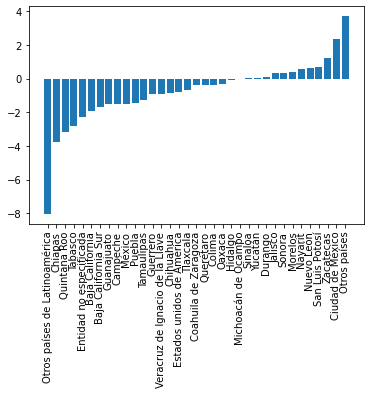

In [13]:
import matplotlib.pyplot as plt
state_coeff=coeff_parameter.loc[(coeff_parameter["Name"] == "state")] 

plt.bar(state_coeff['Value'], state_coeff['Coefficient'])
plt.xticks(rotation=90)
plt.show()


#coeff_parameter.head(50)

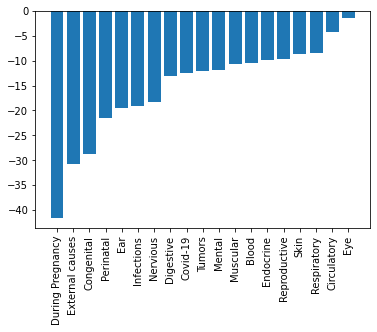

In [14]:
death_coeff=coeff_parameter.loc[(coeff_parameter["Name"] == "deathcauseeng")] 
plt.bar(death_coeff['Value'], death_coeff['Coefficient'])
plt.xticks(rotation=90)
plt.show()

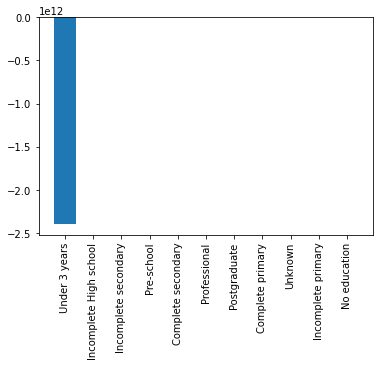

In [15]:
scholarity_coeff=coeff_parameter.loc[(coeff_parameter["Name"] == "scholarity")] 
ax=plt.bar(scholarity_coeff['Value'], scholarity_coeff['Coefficient'])
plt.xticks(rotation=90)

plt.show()

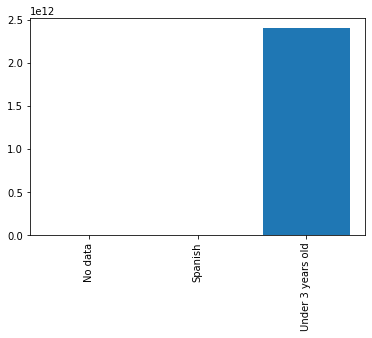

In [16]:
language_coeff=coeff_parameter.loc[(coeff_parameter["Name"] == "languageeng")] 
plt.bar(language_coeff['Value'], language_coeff['Coefficient'])
plt.xticks(rotation=90)
plt.show()

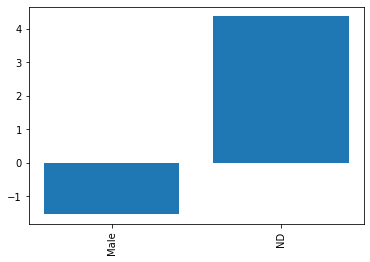

In [17]:
gender_coeff=coeff_parameter.loc[(coeff_parameter["Name"] == "gender")] 
plt.bar(gender_coeff['Value'], gender_coeff['Coefficient'])
plt.xticks(rotation=90)
plt.show()

In [18]:
print(regr.score(X_test, y_test))
print(regr.intercept_)

0.4847157692019868
71.46224968391068


In [20]:
coeff_parameter.to_csv('parameters.csv')